In [127]:
%matplotlib nbagg

import numpy as np
import numpy.linalg as lin

from IPython.display import display,HTML,clear_output
import time

import cv2

import matplotlib as mpl
import matplotlib.pyplot as plt

import math
from math import pi as PI

mpl.use('nbagg')

from matplotlib import animation
mpl.rc('animation', html='html5') #display animated plots inline

from robmob.robot import Robot
from robmob.sensors import KinectRGBSensor
from robmob.visualization import Visualizer

In [128]:
ip_robot = '192.168.0.109'
robot = Robot(ip_robot)
robot.connect()

In [129]:
kinect = KinectRGBSensor()
robot.add_sensor(kinect)
img1 = cv2.imread('qr.png',0)          # queryImage
print("type of img1: ", type(img1))
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)

type of img1:  <class 'numpy.ndarray'>


In [130]:
def get_inlines(image):
    frame = np.array(image)
#     print(frame)
    
    MIN_MATCH_COUNT = 10

    kp2, des2 = sift.detectAndCompute(frame,None)
    
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)

    if len(good) > MIN_MATCH_COUNT:
        return len(good)
    else:
        return 0

In [143]:
def scan_inlines():
    i =0
    val=[]
    while(i <8):
        robot.angular_movement(PI / 8, 1)
        clear_output(wait=True)
        image = kinect.peek_data()
        display(image)
        print(get_inlines(image))
        val.append(get_inlines(image))
        print(val)
        #if len(val)> 1:
            #if val[i] < val[i-1]:
                #robot.angular_movement(-(PI / 8), 1)
                #break
        i+=1        
        time.sleep(2)
    return val
            

In [144]:
def rotate_to_max(liste):
    n = len(liste) - (liste.index(max(liste))+ 1)
    for i in range(0,n+1):
        robot.angular_movement(-(PI / 8), 1)
        time.sleep(2)    
    #robot.angular_movement((2*PI - (a *PI / 8))/5, 5)
    #rad = 2*PI - (a *PI / 8)
    #deg = rad * 180 /PI 
    print(n) 

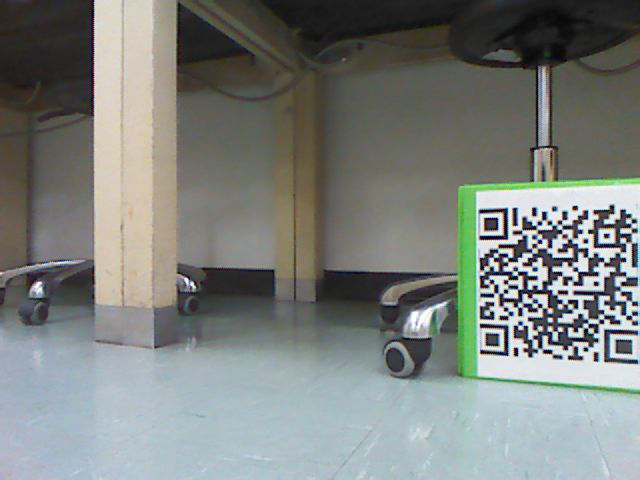

418
[0, 347, 426, 426, 409, 406, 414, 418]
5


In [145]:
liste = scan_inlines()
rotate_to_max(liste)

In [125]:
kinect.buffer.clear()

In [ ]:
from IPython.display import display,HTML,clear_output
import time

N_OF_FRAMES_TO_DISPLAY = 100

for i in range(N_OF_FRAMES_TO_DISPLAY):
    clear_output(wait=True)
    display(kinect.peek_data())
    time.sleep(0.09999)